In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score,roc_curve

import warnings
warnings.simplefilter('ignore')

sns.set_palette('viridis')
sns.set_style('whitegrid')

In [56]:
import pandas as pd

file_path = 'Titanic-Dataset.csv'
df = pd.read_csv("C:/Users/SARAVANA DEVI/Downloads/Titanic-Dataset (1).csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
df.isna().sum() / df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [60]:
def Pie_Plot(df,column):
    counts = df[column].value_counts()

    palette = sns.color_palette('viridis',df[column].nunique())
    plt.pie(counts.values,labels=counts.index,autopct='%.2f%%',colors=palette)
    plt.title(f"Distribution of {column}",fontdict={'fontsize':12,'fontweight':'bold'})

In [61]:
import pandas as pd

print(df.columns)  

columns_to_drop = ['PassengerId', 'Cabin', 'Name', 'Ticket']

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(df.head())  

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


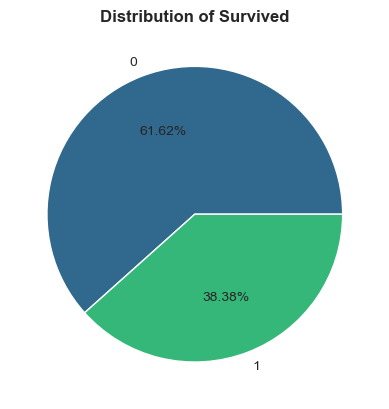

In [62]:
Pie_Plot(df,'Survived')

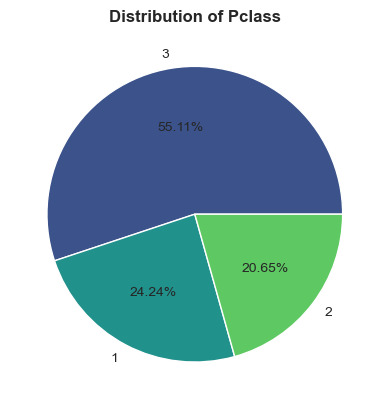

In [63]:
Pie_Plot(df,'Pclass')

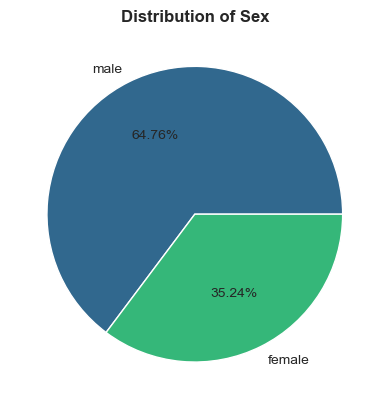

In [64]:
Pie_Plot(df,'Sex')

Text(0.5, 1.0, 'Age Boxplot')

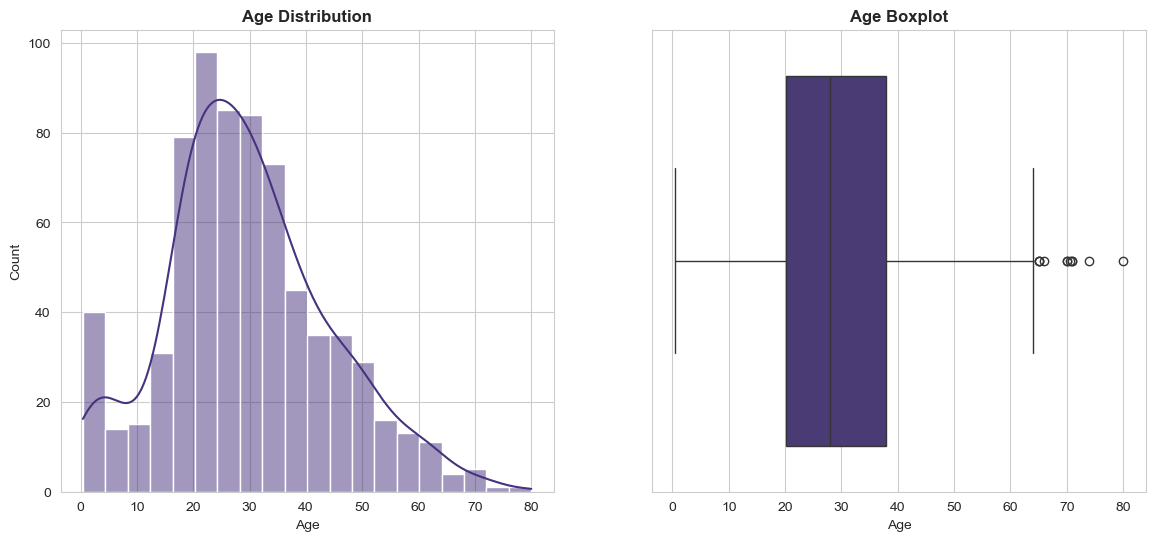

In [65]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize = (14,6))
ax = ax.flatten()
sns.histplot(data=df,x='Age',kde=True,ax=ax[0])
ax[0].set_title("Age Distribution",fontweight = 'bold')

sns.boxplot(data = df,x='Age',ax=ax[1])
ax[1].set_title("Age Boxplot",fontweight = 'bold')


In [66]:
df['Age'].isna().sum()

177

In [67]:
import pandas as pd

df = pd.DataFrame({
    'Pclass': [1, 2, 3, 1, 2, 3],
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Age': [22, None, 24, None, 30, None]  # Some missing values
})

median_age_by_sex = df.groupby(['Pclass', 'Sex'])['Age'].transform('median')

df['Age'] = df['Age'].fillna(median_age_by_sex)

print(df)




   Pclass     Sex   Age
0       1    male  22.0
1       2  female   NaN
2       3    male  24.0
3       1  female   NaN
4       2    male  30.0
5       3  female   NaN


Index(['SibSp'], dtype='object')
SibSp    int64
dtype: object


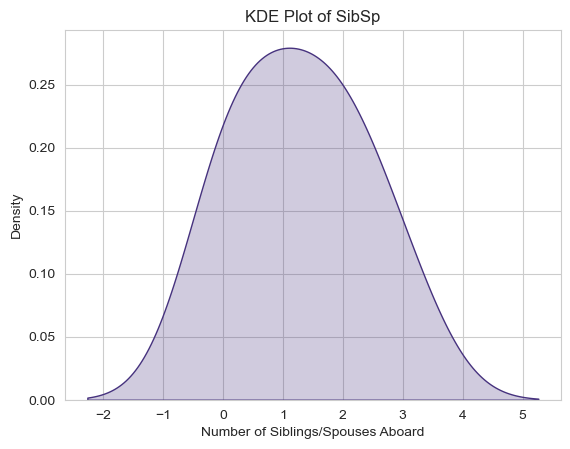

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
df = pd.DataFrame({'SibSp': [0, 1, 2, 3, 1, 0, 2]})

# Check if 'SibSp' exists and is numeric
print(df.columns)  # Should include 'SibSp'
print(df.dtypes)   # Should show 'SibSp' as int or float

# Plotting
sns.kdeplot(x='SibSp', data=df, fill=True)
plt.title('KDE Plot of SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Density')
plt.show()


In [69]:
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'Parch': [0, 1, 2, 1, 0, 2, 1, 0]
}
df = pd.DataFrame(data)

# Get unique values from the 'Parch' column
unique_values = df['Parch'].unique()
print(unique_values)









[0 1 2]


<Axes: xlabel='Parch', ylabel='Density'>

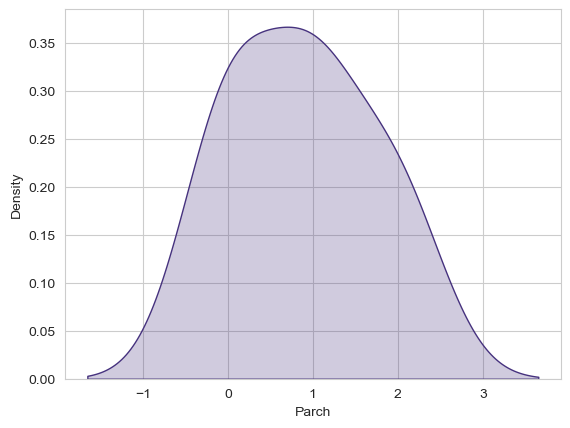

In [70]:
sns.kdeplot(x='Parch', data=df, fill=True)


['Fare']
float64


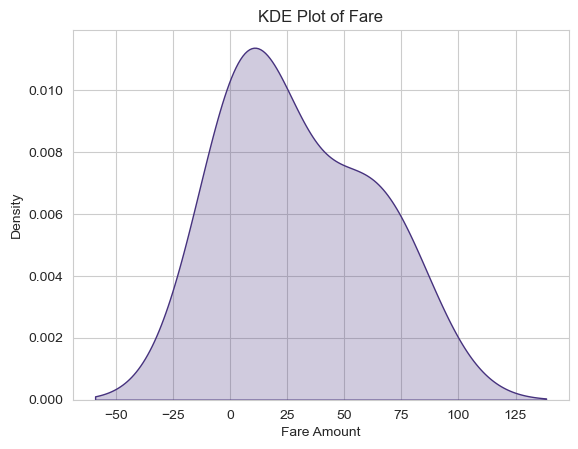

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
data = {
    'Fare': [7.25, 71.83, 8.05, 53.10, 8.46]
}
df = pd.DataFrame(data)

# Check if 'Fare' exists in DataFrame
print(df.columns.tolist())  # Display all columns

# Check data type of 'Fare'
print(df['Fare'].dtype)

# Handle missing values if necessary
df['Fare'].dropna(inplace=True)  # Drop missing values

# Plotting
sns.kdeplot(x='Fare', data=df, fill=True)
plt.title('KDE Plot of Fare')
plt.xlabel('Fare Amount')
plt.ylabel('Density')
plt.show()



In [72]:
import pandas as pd


data = {
    'Embarked': ['S', 'C', None, 'Q', 'S']
}
df = pd.DataFrame(data)


print(df.columns.tolist())  


if 'Embarked' in df.columns:
    missing_values = df['Embarked'].isna().sum()
    print(f'Missing values in Embarked: {missing_values}')
else:
    print("Column 'Embarked' does not exist.")



['Embarked']
Missing values in Embarked: 1


In [73]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

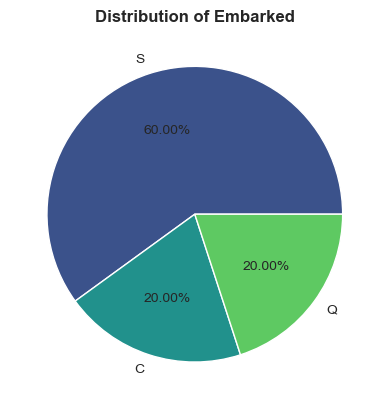

In [74]:
Pie_Plot(df,'Embarked')

In [75]:
import pandas as pd


data = {
    'SibSp': [0, 1, 2, 3],
    'Parch': [0, 1, 1, 0]
}
df = pd.DataFrame(data)

print(df.columns.tolist())  


if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['Family No.'] = df['SibSp'] + df['Parch'] + 1
    print(df)
else:
    print("One or both columns do not exist.")




['SibSp', 'Parch']
   SibSp  Parch  Family No.
0      0      0           1
1      1      1           3
2      2      1           4
3      3      0           4


In [76]:
df['IsAlone'] = df['Family No.'].apply(lambda row: 1 if row == 1 else 0)

In [77]:
df.drop(columns= ['SibSp','Parch'],inplace=True)

In [78]:
import pandas as pd


data = {
    'Age': [5, 13, 20, 36, 65, 80]
}
df = pd.DataFrame(data)


print(df.columns.tolist())  # Display all columns


bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

if 'Age' in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
    print(df)
else:
    print("Column 'Age' does not exist.")


['Age']
   Age     AgeGroup
0    5        Child
1   13     Teenager
2   20  Young Adult
3   36        Adult
4   65       Senior
5   80       Senior


<Axes: xlabel='AgeGroup', ylabel='count'>

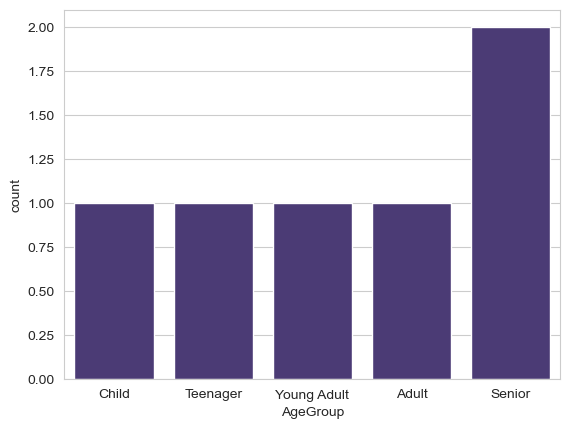

In [79]:
sns.countplot(x=df['AgeGroup'])

In [80]:
def bar_plot_for_survived(column):
    survival = df.groupby(column)['Survived'].value_counts().reset_index()
    ax = sns.barplot(x=column,y='count',hue='Survived',data=survival,palette='viridis',errorbar=None)
    plt.title(f'No. of Survived by {column}',fontdict={'fontweight':'bold'})
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

    plt.show()

['Pclass', 'Survived']


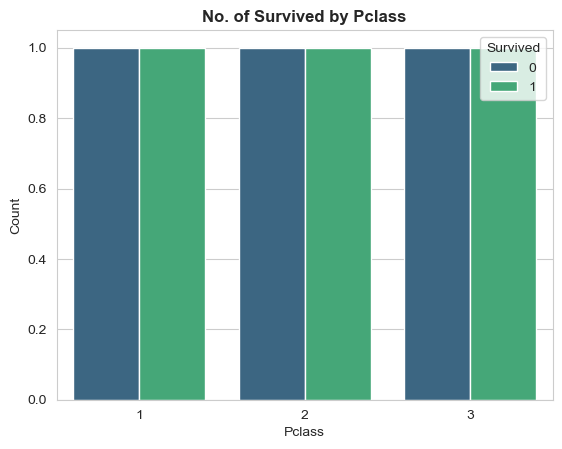

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Pclass': [1, 1, 2, 2, 3, 3],
    'Survived': [1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)


print(df.columns.tolist())  # Display all columns


def bar_plot_for_survived(column):
    if column in df.columns and 'Survived' in df.columns:
        survival = df.groupby(column)['Survived'].value_counts().reset_index(name='count')
        ax = sns.barplot(x=column, y='count', hue='Survived', data=survival, palette='viridis', errorbar=None)
        plt.title(f'No. of Survived by {column}', fontdict={'fontweight': 'bold'})
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Survived', loc='upper right')
        plt.show()
    else:
        print(f"One or both columns '{column}' and 'Survived' do not exist.")


bar_plot_for_survived('Pclass')


In [82]:
bar_plot_for_survived('Sex')

One or both columns 'Sex' and 'Survived' do not exist.


['Age', 'Survived', 'Sex']
Age         float64
Survived      int64
Sex          object
dtype: object


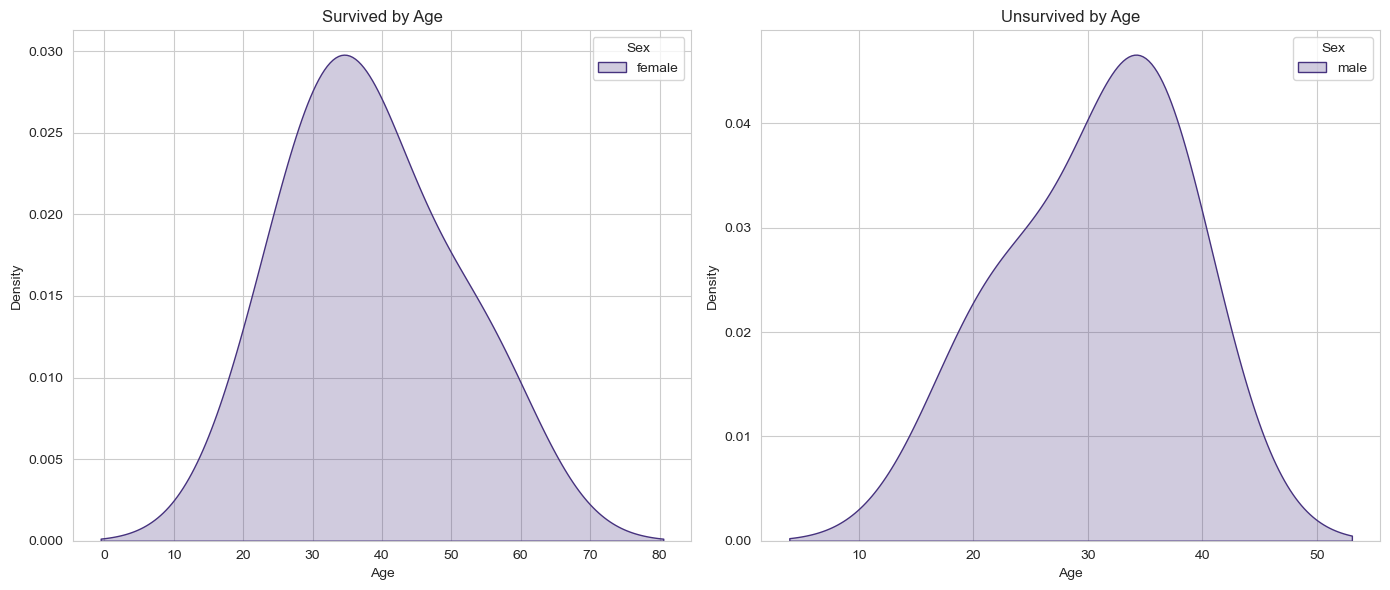

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Age': [22, 38, 26, 35, 35, None, 54],
    'Survived': [0, 1, 1, 1, 0, 0, 1],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'female']
}
df = pd.DataFrame(data)


print(df.columns.tolist())  # Display all columns
print(df.dtypes)            # Display data types


df['Age'].fillna(df['Age'].median(), inplace=True)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


sns.kdeplot(data=df[df['Survived'] == 1], x='Age', hue='Sex', fill=True, ax=ax[0])
ax[0].set_title('Survived by Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Density')


sns.kdeplot(data=df[df['Survived'] == 0], x='Age', hue='Sex', fill=True, ax=ax[1])
ax[1].set_title('Unsurvived by Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [84]:
bar_plot_for_survived('AgeGroup')

One or both columns 'AgeGroup' and 'Survived' do not exist.


Text(0.5, 1.0, 'Age Distribution by Survival')

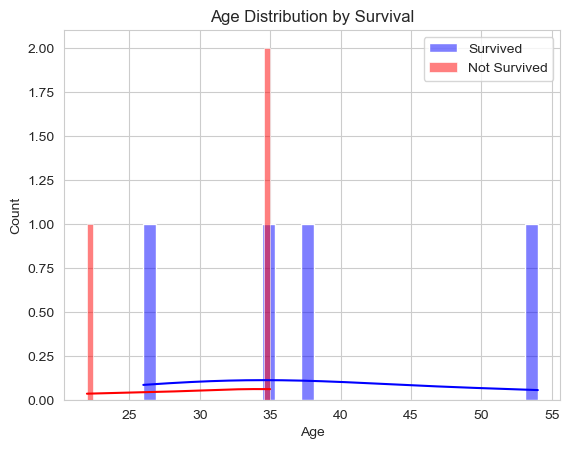

In [85]:
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, label='Survived', color='blue')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, label='Not Survived', color='red')
plt.legend()
plt.title('Age Distribution by Survival')


In [86]:
bar_plot_for_survived('Family No.')


One or both columns 'Family No.' and 'Survived' do not exist.


In [87]:
bar_plot_for_survived('Embarked')

One or both columns 'Embarked' and 'Survived' do not exist.


In [88]:
bar_plot_for_survived('IsAlone')

One or both columns 'IsAlone' and 'Survived' do not exist.


['SibSp', 'Parch', 'Survived', 'Sex', 'IsAlone']


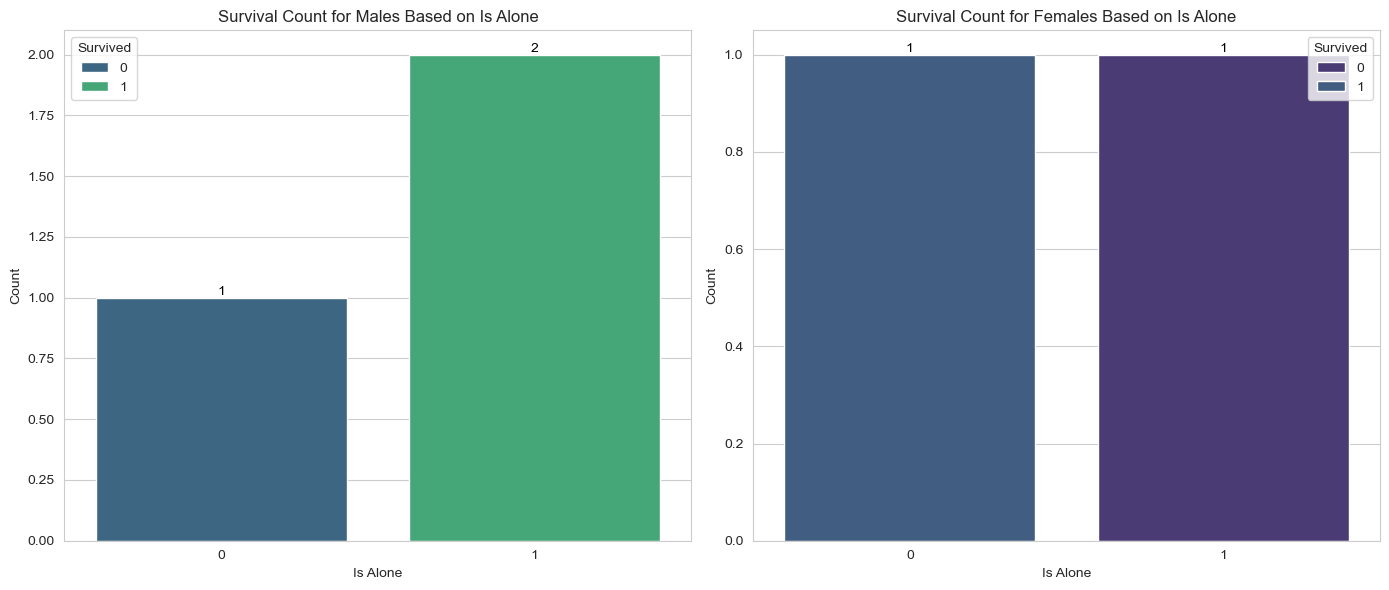

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'SibSp': [0, 1, 2, 0, 0],
    'Parch': [0, 1, 0, 0, 0],
    'Survived': [1, 0, 1, 0, 1],
    'Sex': ['male', 'male', 'female', 'female', 'male']
}
df = pd.DataFrame(data)


df['IsAlone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)


df['IsAlone'] = df['IsAlone'].astype(int)


print(df.columns.tolist())  # Display all columns


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.countplot(x='IsAlone', hue='Survived', data=df[df['Sex'] == 'male'], ax=ax[0], palette='viridis')
ax[0].set_title('Survival Count for Males Based on Is Alone')
ax[0].set_xlabel('Is Alone')
ax[0].set_ylabel('Count')
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

sns.countplot(x='IsAlone', hue='Survived', data=df[df['Sex'] == 'female'], ax=ax[1])
ax[1].set_title('Survival Count for Females Based on Is Alone')
ax[1].set_xlabel('Is Alone')
ax[1].set_ylabel('Count')
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()


['Fare', 'Survived']


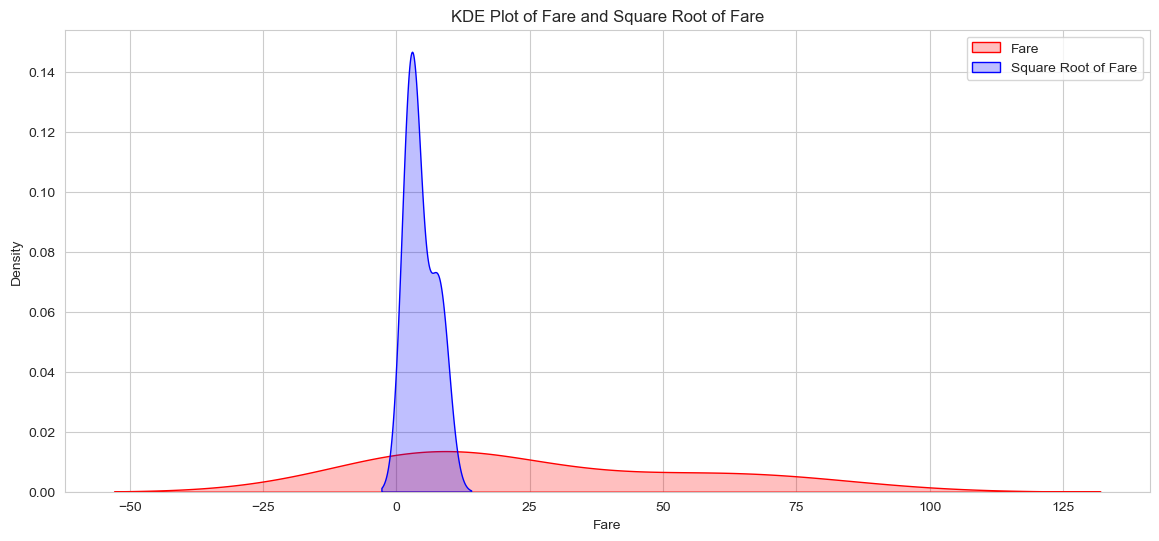

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Fare': [7.25, 71.83, 8.05, 53.10, None, 8.46],
    'Survived': [0, 1, 1, 1, 0, 0]
}
df = pd.DataFrame(data)


print(df.columns.tolist())  # Display all columns

df['Fare'].fillna(df['Fare'].median(), inplace=True)


plt.figure(figsize=(14, 6))

sns.kdeplot(x=df['Fare'], color='r', fill=True)
sns.kdeplot(x=np.sqrt(df['Fare']), color='b', fill=True)

plt.title('KDE Plot of Fare and Square Root of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(['Fare', 'Square Root of Fare'])
plt.show()


In [91]:
import pandas as pd
import numpy as np


data = {
    'Fare': [7.25, 71.83, 8.05, 53.10, None, 8.46]
}
df = pd.DataFrame(data)


df['Fare'].fillna(df['Fare'].median(), inplace=True)


f = pd.DataFrame()


f['Fare'] = np.sqrt(df['Fare'])


print(f)



       Fare
0  2.692582
1  8.475258
2  2.837252
3  7.286975
4  2.908608
5  2.908608


<Axes: >

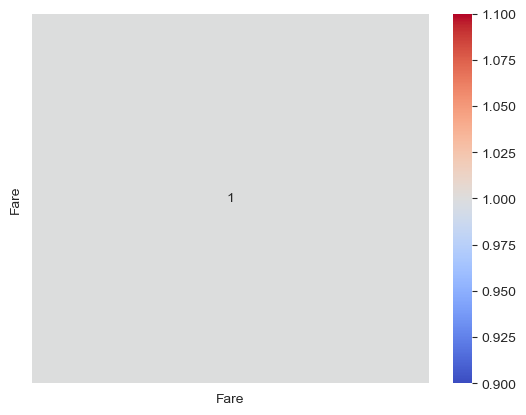

In [92]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

In [93]:
import pandas as pd


data = {
    'Sex': ['male', 'female', 'female', 'male', 'female']
}
df = pd.DataFrame(data)


print(df.columns.tolist())  # Display all columns


if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].apply(lambda row: 1 if row == 'male' else 0)
    print(df)
else:
    print("Column 'Sex' does not exist.")


['Sex']
   Sex
0    1
1    0
2    0
3    1
4    0


In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


data = {
    'AgeGroup': ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'],
    'Embarked': ['S', 'C', 'Q', 'S', 'C']
}
df = pd.DataFrame(data)


print(df.columns.tolist())  


if 'AgeGroup' in df.columns and 'Embarked' in df.columns:
    encoder = OneHotEncoder()
    encoded_array = encoder.fit_transform(df[['AgeGroup', 'Embarked']])

   
    encoded_df = pd.DataFrame(encoded_array.toarray(), columns=encoder.get_feature_names_out(['AgeGroup', 'Embarked']))

   
    df = pd.concat([df, encoded_df], axis=1).drop(columns=['AgeGroup', 'Embarked'])

    
    print(df)
else:
    print("One or both columns 'AgeGroup' and 'Embarked' do not exist.")


['AgeGroup', 'Embarked']
   AgeGroup_Adult  AgeGroup_Child  AgeGroup_Senior  AgeGroup_Teenager  \
0             0.0             1.0              0.0                0.0   
1             0.0             0.0              0.0                1.0   
2             0.0             0.0              0.0                0.0   
3             1.0             0.0              0.0                0.0   
4             0.0             0.0              1.0                0.0   

   AgeGroup_Young Adult  Embarked_C  Embarked_Q  Embarked_S  
0                   0.0         0.0         0.0         1.0  
1                   0.0         1.0         0.0         0.0  
2                   1.0         0.0         1.0         0.0  
3                   0.0         0.0         0.0         1.0  
4                   0.0         1.0         0.0         0.0  


In [95]:
import pandas as pd


data = {
    'Name': ['John', 'Jane', 'Doe'],
    'Age': [22, 35, 29],
    'Fare': [7.25, 71.83, 8.05]
}
df = pd.DataFrame(data)


print(df.columns.tolist())  


if 'Age' in df.columns:
    df.drop(columns='Age', inplace=True)
    print("Column 'Age' dropped.")
else:
    print("Column 'Age' does not exist.")


print(df)


['Name', 'Age', 'Fare']
Column 'Age' dropped.
   Name   Fare
0  John   7.25
1  Jane  71.83
2   Doe   8.05


In [96]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[['Fare']])
scaled_df = pd.DataFrame(scaled_array, columns=['Fare_scaled'], index=df.index)

df = pd.concat([df, scaled_df], axis=1).drop(columns=['Fare'])


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = {
    'Pclass': [1, 1, 2, 2, 3],
    'Sex': [1, 0, 0, 1, 1],  
    'Age': [22, 38, 26, 35, None],
    'Fare': [7.25, 71.83, 8.05, 53.10, 8.46],
    'Survived': [0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)


print(df.columns.tolist())


if 'Survived' in df.columns:
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


    print(f"X_train shape -> {X_train.shape}")
    print(f"y_train shape -> {y_train.shape}")
    print(f"X_test shape -> {X_test.shape}")
    print(f"y_test shape -> {y_test.shape}")
else:
    print("Column 'Survived' does not exist.")

   


['Pclass', 'Sex', 'Age', 'Fare', 'Survived']
X_train shape -> (3, 4)
y_train shape -> (3,)
X_test shape -> (2, 4)
y_test shape -> (2,)


In [98]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Knn': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


data = {
    'Pclass': [1, 1, 2, 2, 3],
    'Sex': [1, 0, 0, 1, 1],  
    'Age': [22, 38, 26, 35, None],
    'Fare': [7.25, 71.83, 8.05, 53.10, 8.46],
    'Survived': [0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)


df['Age'].fillna(df['Age'].mean(), inplace=True)


X = df.drop(['Survived'], axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Print shapes of the resulting datasets
print(f"X_train shape -> {X_train.shape}")
print(f"y_train shape -> {y_train.shape}")
print(f"X_test shape -> {X_test.shape}")
print(f"y_test shape -> {y_test.shape}")


models = {
    'Random Forest': RandomForestClassifier(random_state=42)
}


for model_name, model in models.items():
   
    min_class_size = y_train.value_counts().min()
    
    
    n_splits = max(2, min(3, min_class_size))
    
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    print(model_name)
    print('-' * len(model_name))
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Std CV Accuracy: {np.std(cv_scores):.4f}")





X_train shape -> (3, 4)
y_train shape -> (3,)
X_test shape -> (2, 4)
y_test shape -> (2,)
Random Forest
-------------
Cross-validation scores: [0.5 0. ]
Mean CV Accuracy: 0.2500
Std CV Accuracy: 0.2500


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


data = {
    'Pclass': [1, 1, 2, 2, 3],
    'Sex': [1, 0, 0, 1, 1],  # Assume Sex has been encoded
    'Age': [22, 38, 26, 35, None],
    'Fare': [7.25, 71.83, 8.05, 53.10, 8.46],
    'Survived': [0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)


df['Age'].fillna(df['Age'].mean(), inplace=True)


X = df.drop(['Survived'], axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


Log_model = LogisticRegression(random_state=42)


params = {
    'penalty': ['l1', 'l2', 'none'],  
    'solver': ['liblinear']            
}


min_class_size = y_train.value_counts().min()
n_splits = min(5, min_class_size) if min_class_size > 1 else 2

grid_log_model = GridSearchCV(Log_model, param_grid=params, cv=n_splits, n_jobs=-1, verbose=1)
grid_log_model.fit(X_train, y_train)


train_accuracy = accuracy_score(y_train, grid_log_model.best_estimator_.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_log_model.best_estimator_.predict(X_test))


print(grid_log_model.best_params_)
print(grid_log_model.best_score_)
print(grid_log_model.best_estimator_)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")




Fitting 2 folds for each of 3 candidates, totalling 6 fits
{'penalty': 'l1', 'solver': 'liblinear'}
nan
LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
Train Accuracy: 1.0000
Test Accuracy: 0.0000


In [101]:
y_pred = grid_log_model.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



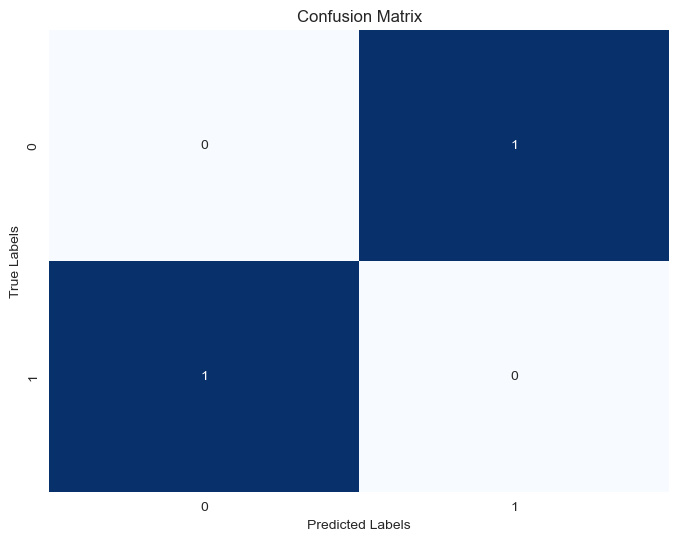

In [102]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = {
    'Pclass': [1, 1, 2, 2, 3],
    'Sex': [1, 0, 0, 1, 1],  
    'Age': [22, 38, 26, 35, None],
    'Fare': [7.25, 71.83, 8.05, 53.10, 8.46],
    'Survived': [0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)


df['Age'].fillna(df['Age'].mean(), inplace=True)


X = df.drop(['Survived'], axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


Ran_model = RandomForestClassifier(random_state=42)


params = {
    'max_depth': [20],                  # Reduced to one value for quicker testing
    'max_features': [2],                # Reduced to one value for quicker testing
    'min_samples_leaf': [3],            # Reduced to one value for quicker testing
    'min_samples_split': [8],           # Reduced to one value for quicker testing
    'n_estimators': [100]               # Reduced to one value for quicker testing
}


min_class_size = y_train.value_counts().min()
n_splits = min(3, min_class_size) if min_class_size > 1 else 2

grid_Ran_model = GridSearchCV(Ran_model, param_grid=params, cv=n_splits, n_jobs=-1, verbose=1)
grid_Ran_model.fit(X_train, y_train)


train_accuracy = accuracy_score(y_train, grid_Ran_model.best_estimator_.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_Ran_model.best_estimator_.predict(X_test))


print(grid_Ran_model.best_params_)
print(grid_Ran_model.best_score_)
print(grid_Ran_model.best_estimator_)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Fitting 2 folds for each of 1 candidates, totalling 2 fits
{'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.75
RandomForestClassifier(max_depth=20, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, random_state=42)
Train Accuracy: 0.6667
Test Accuracy: 0.5000


In [104]:
y_pred = grid_Ran_model.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



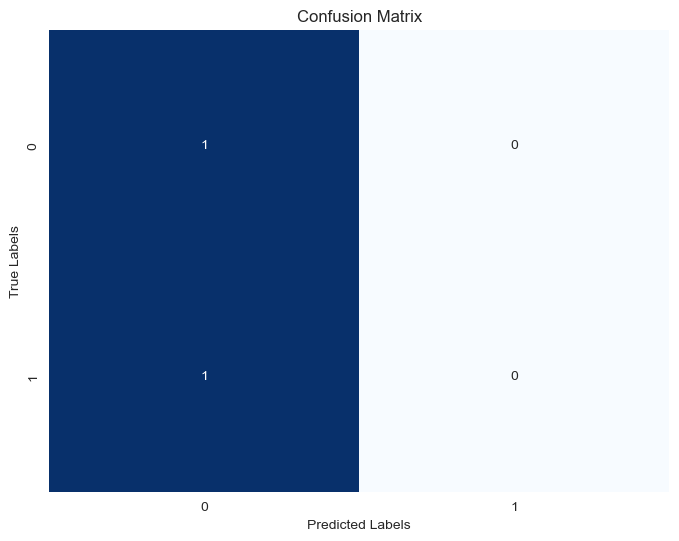

In [105]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

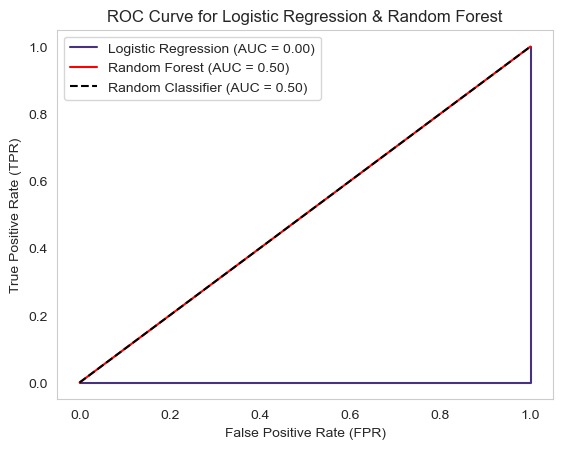

In [106]:
y_pred_proba_log = grid_log_model.best_estimator_.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)


y_pred_proba_rf = grid_Ran_model.best_estimator_.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})',color = 'r')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression & Random Forest')
plt.legend()
plt.grid()
plt.show()